In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.svm import LinearSVC
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split

# 2

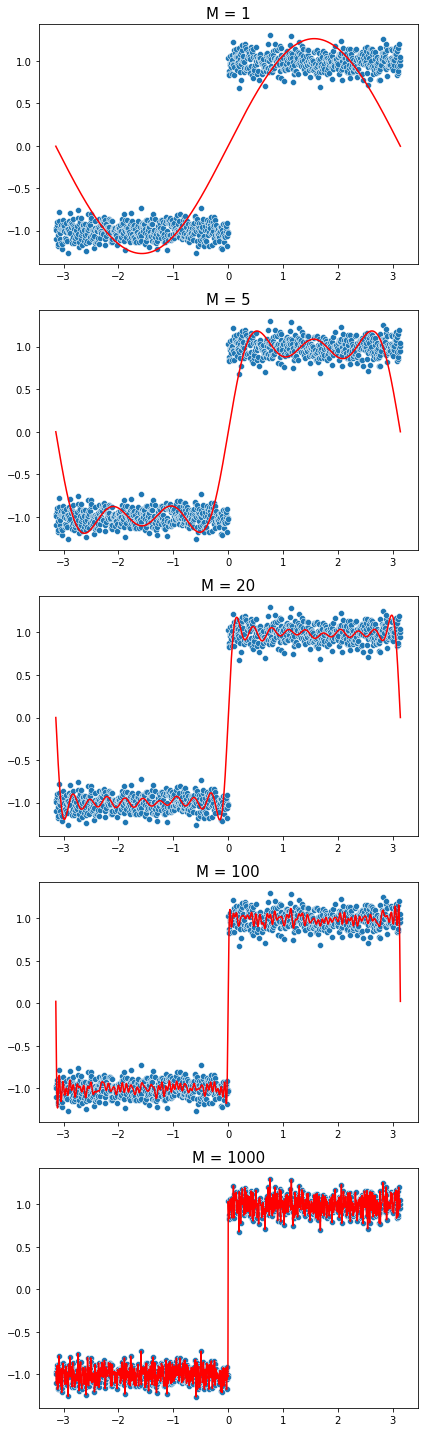

In [2]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar18/sgn.csv'
df = pd.read_csv(path)

x = df['x'].to_numpy()
y = df['y'].to_numpy()

M = [1, 5, 20, 100, 1000]

fig, ax = plt.subplots(5, 1, figsize=(6, 20))

for i, m in zip(ax, M):
    X = []
    for each in x:
        new_row=[]
        [new_row.extend([np.sin(each*j), np.cos(each*j)]) for j in range(1,m+1)]
        X.append(new_row)

    X = pd.DataFrame(X).to_numpy()
    
    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    i.set_title(f'M = {m}', size=15)
    sns.scatterplot(x=x, y=y, ax=i)
    sns.lineplot(x=x, y=y_pred, ax=i, color='red')
plt.tight_layout()

# 3

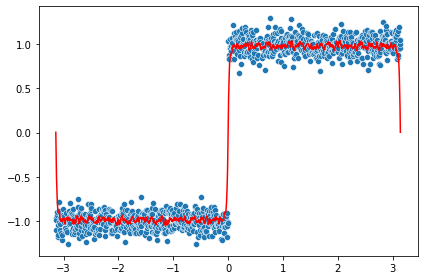

In [3]:
X = []
m = 1000

for each in x:
    new_row=[]
    [new_row.extend([np.sin(each*j), np.cos(each*j)]) for j in range(1, m+1)]
    X.append(new_row)

X = pd.DataFrame(X).to_numpy()

model = LassoCV(positive=True)
model.fit(X, y)

y_pred = model.predict(X)

sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=y_pred, color='red')
plt.tight_layout()

# 4

In [4]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar18/BRCA_pam50.tsv'
df = pd.read_csv(path, sep='\t', index_col=0)
df = df.loc[df.Subtype.isin(['Luminal A', 'Luminal B'])]

X = df.iloc[:,:-1].to_numpy()
y = df['Subtype'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)

In [5]:
model = LinearSVC(class_weight='balanced', max_iter=1e9)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_pred, y_test))

0.8961201501877347


In [6]:
df1 = df.iloc[:, :-1]
df1.loc['Weights'] = model.coef_[0]
df1.loc['Weights'] = np.abs(df1.loc['Weights'])
df1 = df1.sort_values(by='Weights', axis=1, ascending=False).iloc[:-1, :2]

X = df1.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(balanced_accuracy_score(y_pred, y_test))

0.6872517154207295


In [7]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar18/BRCA_pam50.tsv'
df = pd.read_csv(path, sep='\t', index_col=0)
df = df.loc[df.Subtype.isin(['Luminal A', 'Luminal B'])]

X = df.iloc[:,:-1].to_numpy()
y = df['Subtype'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)

model = LogisticRegression(class_weight = 'balanced', C=0.01, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
print(model.coef_, '\n\n')
y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_pred, y_test))

[[ 0.          0.          0.          0.          0.          0.
   0.27090493  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.36144195  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]] 


0.7992673992673993


# 5

In [8]:
np.random.seed(17)
reg = LogisticRegression(penalty = 'none')

M = 10000
N = 20
count = 0
for i in range(M):
    
    X = np.random.normal(loc=0, scale=1, size=(N, 2))
    y = np.array([0]*10 + [1]*10)
    reg.fit(X, y)

    y_pred = reg.predict(X)
    if accuracy_score(y, y_pred) == 1:
        count += 1

print(count / M)

0.0002
